In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress

In [2]:
clean = pd.read_csv("D:\clean_data_1921.csv")
clean['AGE'] = clean['AGE'].replace('Less than 20', '20 or less')
clean.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,3/1/2019 4:17,3,0,10,10,9,10,7,3,2,...,8,0,2,1,6,3,10,20 or less,Female,699.1
1,3/2/2019 22:26,2,3,7,7,1,5,4,0,2,...,7,4,0,2,10,1,4,51 or more,Female,636.3
2,3/3/2019 3:06,5,2,5,3,4,3,4,0,1,...,3,0,3,2,5,5,10,36 to 50,Female,676.5
3,3/3/2019 12:20,1,5,6,5,10,4,2,4,1,...,6,6,2,1,6,1,7,36 to 50,Female,631.4
4,3/4/2019 0:48,2,4,10,3,3,1,1,4,1,...,9,10,2,1,1,1,5,21 to 35,Female,600.8


In [3]:
clean_df = clean.rename(columns = {"TIME_FOR_PASSION": "Time for Passion",
                                    "WORK_LIFE_BALANCE_SCORE": "Work- Life Balance Score",
                                    "AGE": "Age"})
clean_df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,Time for Passion,WEEKLY_MEDITATION,Age,GENDER,Work- Life Balance Score
0,3/1/2019 4:17,3,0,10,10,9,10,7,3,2,...,8,0,2,1,6,3,10,20 or less,Female,699.1
1,3/2/2019 22:26,2,3,7,7,1,5,4,0,2,...,7,4,0,2,10,1,4,51 or more,Female,636.3
2,3/3/2019 3:06,5,2,5,3,4,3,4,0,1,...,3,0,3,2,5,5,10,36 to 50,Female,676.5
3,3/3/2019 12:20,1,5,6,5,10,4,2,4,1,...,6,6,2,1,6,1,7,36 to 50,Female,631.4
4,3/4/2019 0:48,2,4,10,3,3,1,1,4,1,...,9,10,2,1,1,1,5,21 to 35,Female,600.8


In [4]:
clean2_df = clean_df[["Age", "Time for Passion", "Work- Life Balance Score"]]
clean2_df

,Age,Time for Passion,Work- Life Balance Score
0,20 or less,3,699.1
1,51 or more,1,636.3
2,36 to 50,5,676.5
3,36 to 50,1,631.4
4,21 to 35,1,600.8
...,...,...,...
5543,51 or more,2,644.5
5544,21 to 35,5,714.9
5545,21 to 35,1,716.6
5546,21 to 35,6,682.0


In [5]:
#Find the number of people, per age range, who make time for passion
# mean_age = clean2_df.groupby("Age").mean()
sum_age = clean2_df[["Age", "Time for Passion"]].groupby("Age").sum()
sum_age


,Time for Passion
Age,
20 or less,1484
21 to 35,7817
36 to 50,5826
51 or more,4087


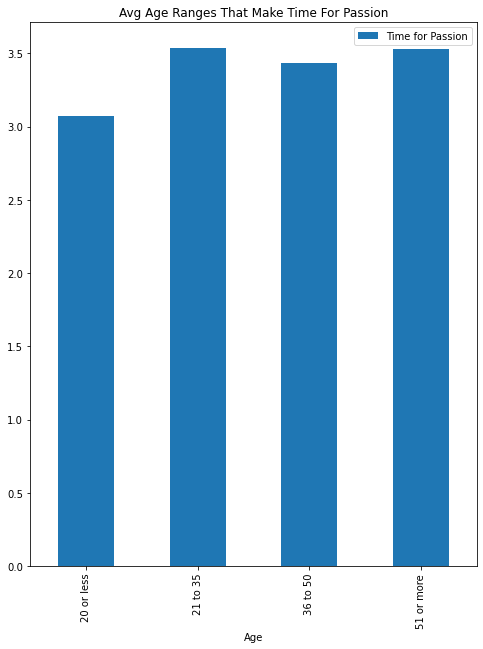

In [6]:
# clean_df["Age"].value_counts().sort_index()
mean_age = clean2_df[["Age", "Time for Passion"]].groupby("Age").mean()
mean_age.plot(kind = "bar", figsize = (8, 10))
mean_age
plt.title("Avg Age Ranges That Make Time For Passion")
plt.savefig("D:/Project 1/Fig1.png")
plt.show()

In [7]:
mean_age.head()

,Time for Passion
Age,
20 or less,3.072464
21 to 35,3.533906
36 to 50,3.437168
51 or more,3.529361


In [8]:
passion = clean2_df.groupby(["Time for Passion"])
passion.head()


,Age,Time for Passion,Work- Life Balance Score
0,20 or less,3,699.1
1,51 or more,1,636.3
2,36 to 50,5,676.5
3,36 to 50,1,631.4
4,21 to 35,1,600.8
5,21 to 35,1,588.9
6,21 to 35,1,605.9
7,20 or less,5,648.0
8,36 to 50,0,647.9
9,51 or more,5,693.8


In [9]:
avg_bal = passion["Work- Life Balance Score"].mean()
avg_bal.head()

Time for Passion
0    620.381296
1    647.205405
2    659.741293
3    666.893553
4    674.367885
Name: Work- Life Balance Score, dtype: float64

In [10]:
passion_bal = pd.DataFrame(avg_bal)
passion_bal.head()

,Work- Life Balance Score
Time for Passion,
0,620.381296
1,647.205405
2,659.741293
3,666.893553
4,674.367885


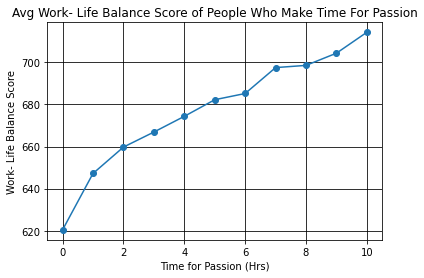

In [11]:
# plt.scatter(avg_bal, marker="o", facecolors="red", edgecolors="black")
plt.plot(passion_bal, marker = "o")
plt.title("Avg Work- Life Balance Score of People Who Make Time For Passion")
plt.xlabel("Time for Passion (Hrs)")
plt.ylabel("Work- Life Balance Score")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")
plt.savefig("D:/Project 1/Fig2.png")
plt.show()